<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: reto del fin de semana

El reto de esta semana es implementar el algoritmo de Singular Value Decomposition para comprimir una imagen. Podéis guiaros por lo visto en las clases y os recomiendo también esta web:

https://timbaumann.info/svd-image-compression-demo/

## SVD para comprimir una imagen

El algoritmo de Singular Value Decomposition, del que ya hemos hablado en el módulo, nos puede servir para comprimir una imagen. Vamos a implementar varias funciones para esto. Como repaso, el algoritmo nos devuelve la descomposición de una matriz en tres matrices, una de ellas con los elementos principales y las otras dos con los vectores principales.

Usaremos:

- Una imagen de `scipy.datasets`
- La implementación del algoritmo en `scipy.linalg`: https://docs.scipy.org/doc/scipy-1.14.0/reference/generated/scipy.linalg.svd.html
- La librería `matplotlib`para las gráficas
- El error SSE (sum of squared estimate of errors)


Definición:

$$SSE =  \sum_{i=1}^{n}  (x_{i} -  \widehat{x}_i ) ^2 $$

Donde:

- $x_i$ son los valores de la matriz original X
- $\widehat{x}_i$ son los valores de la matriz reconstruida $\widehat{X}$

Lo primero, vemos la imagen que vamos a comprimir:

In [1]:
!pip install pooch

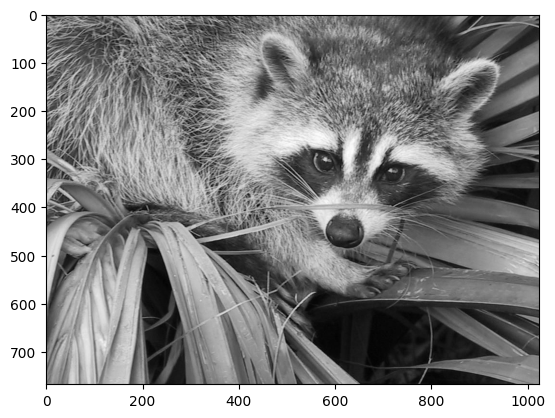

In [16]:
import matplotlib.pyplot as plt
from scipy import misc, datasets
%matplotlib inline

# Load image
A = datasets.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

In [15]:
A

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

In [4]:
type(A)

numpy.ndarray

In [5]:
A.shape

(768, 1024)

Las siguientes funciones te ayudarán a llegar a la solución final:

### 1. Implementa la función para el SSE
La función debe tener como entrada las dos matrices y como salida un número que será el error cometido.

In [6]:
import numpy as np
from scipy.ndimage import uniform_filter

def sse_score(X, X_hat):
    return np.sum((X - X_hat) ** 2)
    
X = np.array([[1, 2], [3, 4]])
X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])
sse = sse_score(X, X_hat)  
print(sse)

0.09879999999999997


### 2. Implementa una función para ejecutar SVD
La función debe tener como entrada una matriz y como salida las tres matrices de la descomposición.

In [7]:
import numpy as np
from scipy.linalg import svd

def svdFunc(X):
    U, s, Vt = svd(X, full_matrices=False)
    S = np.diag(s)
    return U, S, Vt # S es una matriz diagonal

U, S, Vt = svdFunc(A)


print(U.shape)
print(S.shape)
print(Vt.shape)
print("-----------")
print(U@S@Vt)
print(A)

(768, 768)
(768, 768)
(768, 1024)
-----------
[[114.000046 129.99994  144.99992  ... 119.000206 128.99983  136.99992 ]
 [ 82.992966 104.009834 123.01907  ... 117.99725  133.99771  145.99814 ]
 [ 67.99483   87.99909  109.00188  ... 119.001236 134.00076  145.00087 ]
 ...
 [ 97.99819  103.00059  115.999344 ... 143.99905  143.0006   142.99948 ]
 [ 93.998924 103.99979  119.99972  ... 143.00056  141.99922  141.99997 ]
 [ 93.99999  106.000946 118.99969  ... 141.99928  141.       139.99973 ]]
[[114 130 145 ... 119 129 137]
 [ 83 104 123 ... 118 134 146]
 [ 68  88 109 ... 119 134 145]
 ...
 [ 98 103 116 ... 144 143 143]
 [ 94 104 120 ... 143 142 142]
 [ 94 106 119 ... 142 141 140]]


Text(0.5, 1.0, 'Gráfica de porcentaje de valores singulares')

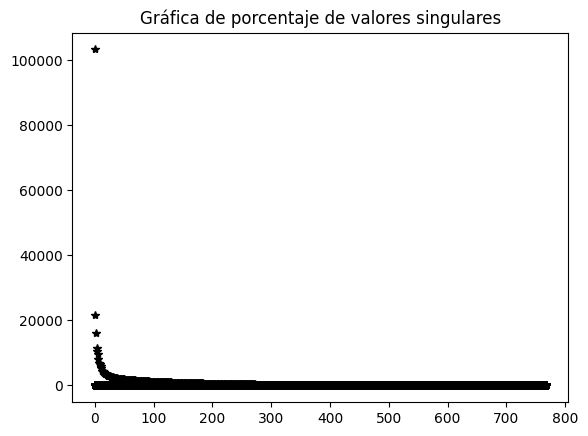

In [8]:
import matplotlib.pyplot as plt
    

plt.plot(np.array(range(len(S))),S, '*', color ='k')
plt.title("Gráfica de porcentaje de valores singulares")

### 3. Implementa una función para reconstruir la imagen

Esta función deberá reconstruir la imagen a partir de un set de matrizes (U, S, Vt) dado.

In [9]:
def reconstruction(U, S, Vt, n_comp=10):
    num = U[:, :n_comp] @ S[0:n_comp, :n_comp] @ Vt[:n_comp, :]
    # for i in range(n_comp):
    #     num += U * S * Vt
    return num
        

U = np.array([[-0.40455358, -0.9145143 ],
              [-0.9145143 ,  0.40455358]])
S = np.array([[5.4649857 , 0.        ],
              [0.        , 0.36596619]])
Vt = np.array([[-0.57604844, -0.81741556],
               [ 0.81741556, -0.57604844]])

X_hat = reconstruction(U, S, Vt)
X_hat

array([[0.99999999, 1.99999998],
       [3.00000003, 4.00000001]])

En este punto, ya puedes ver cuál es el error cometido si se reconstruye la matriz inicial directamente después de aplicar SVD.

In [10]:
sse = sse_score(X, X_hat)
print(f"El error de reconstrucción es: {sse}")

El error de reconstrucción es: 1.4715305057493961e-15


### 4. Implementa la compresión

Esta es la parte más complicada. A la función le tendremos que pasar la imagen, en forma matricial, y el número de componentes que queremos usar para la compresión.

La función aplicará SVD y reconstruirá la matriz usando solo los n_comp primeros valores propios de la descomposición. 

In [17]:
### TODO: Función que recibe una imagen A y devuelve la imagen comprimida
### Tiene como entrada A y el número de componentes para realizar la reducción de dimensionalidad
### Devuelve la imagen comprimidad y el error de reconstrucción

def image_compression(A, n_comp):
    # TODO 1: Aplicar SVD (usando la función que hemos creado)
    U, S, Vt = svdFunc(A)
    
    # TODO 2: Reconstruir usando solo el número de componentes n_comp (usando la función que hemos creado)
    A_hat = reconstruction(U, S, Vt, n_comp)
    
    # TODO 3: Calcular el error
    sse = sse_score(A,A_hat)

    return A_hat, sse # A_hat es la matriz comprimida y sse es su error respecto de A

racoon = datasets.face(gray=True)
racoon_hat, sse = image_compression(racoon, n_comp=50)

### 5. Gráficas del resultado

Por último, se pide que pruebes para varios valores del número de componentes y grafiques la imagen original junto con varias compresiones. Puedes usar un grid 2x2 de `matplotlib`.

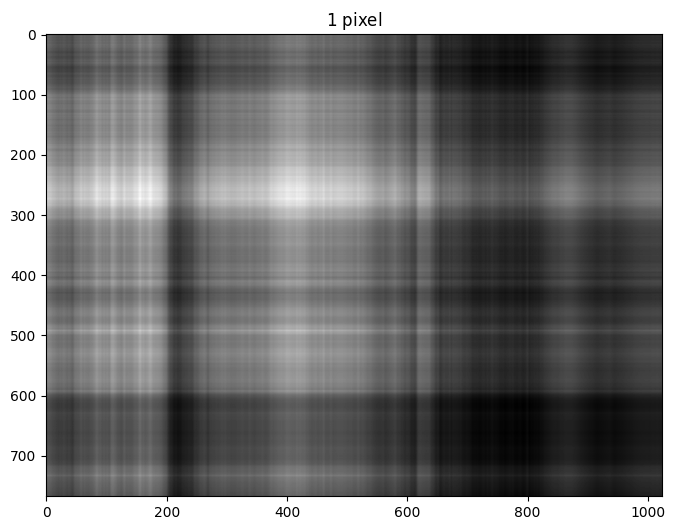

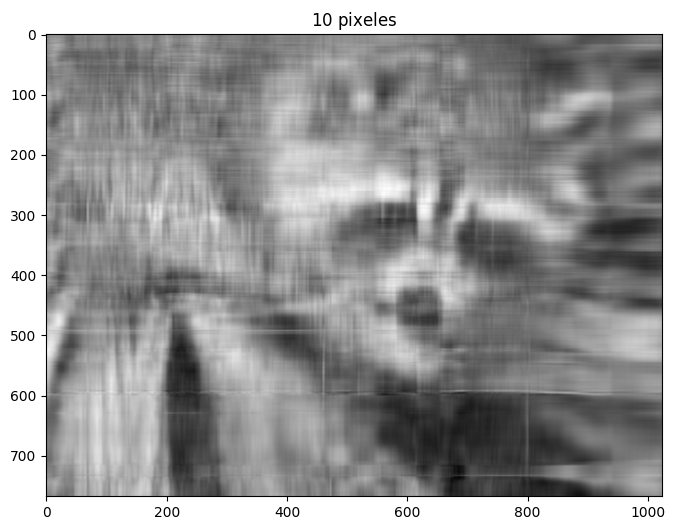

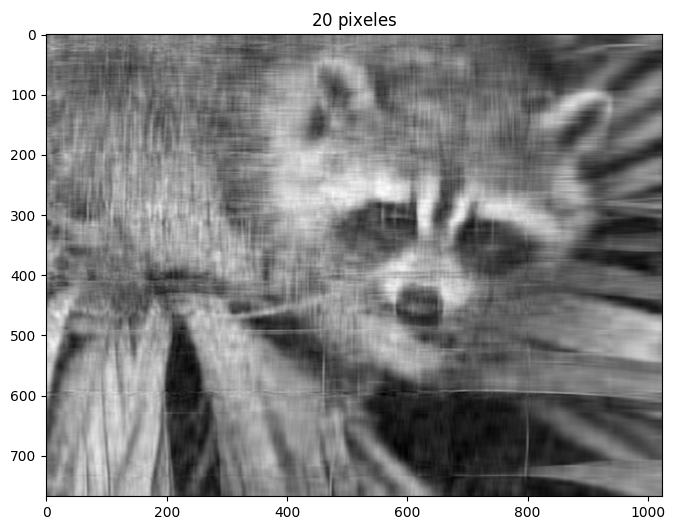

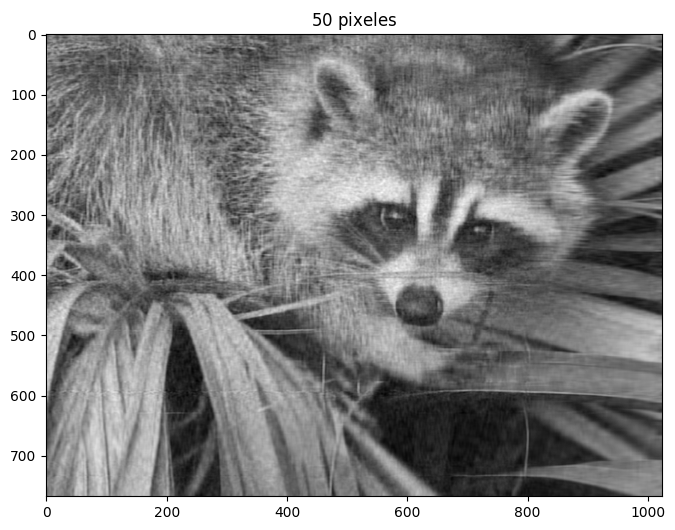

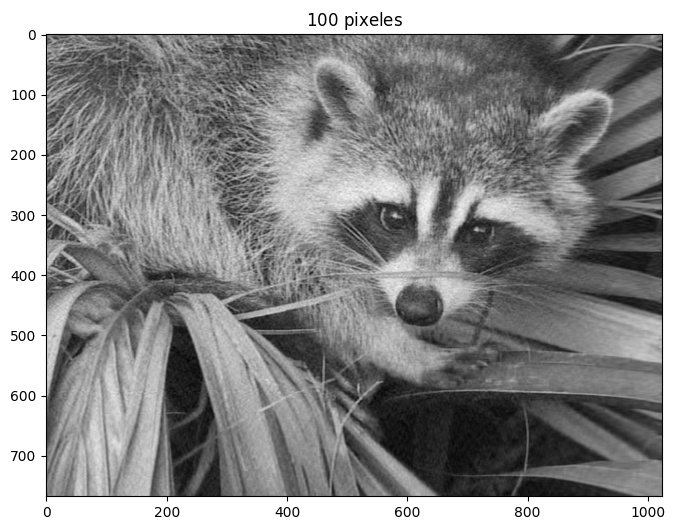

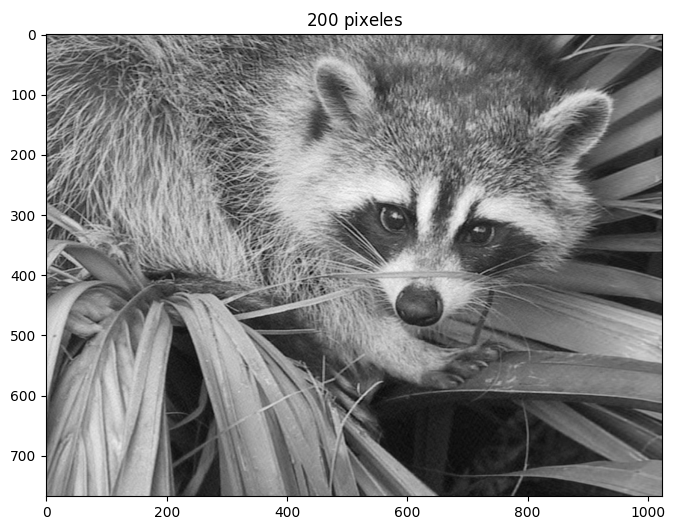

In [12]:
import matplotlib.pyplot as plt
# TODO Dibuja las graficas

# 1 Crear gráfica con plt.figure()

# 2 Elegir un n_comp y aplicar la función image_compression()
racoon = datasets.face(gray=True)
for num in [1,10,20,50,100,200]:
    plt.figure(figsize=(8, 6)) 
    plt.title(f'${str(num)} ${' pixel' if num == 1 else ' pixeles'}')
    A_hat, sse = image_compression(racoon, num)
    plt.imshow(A_hat, cmap=plt.cm.gray)
    plt.show()
    
# 3 Usar plt.imshow(A_hat, cmap=plt.cm.gray), donde A_hat va a ser la matriz comprimida resultante del paso anterior

# 4 Añadir un título a la gráfica

# Repetir para distintas compresiones (distinto n_comp)